In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB


In [5]:
data.describe()

,기준년월,품목대분류코드,품목중분류코드,매출금액,매출건수
count,519297.000000,519297.000000,519297.000000,5.192970e+05,519297.000000
mean,201995.665719,18.282054,1839.539046,2.188457e+06,48.958860
std,74.914933,13.237654,1323.699108,6.438257e+06,163.855617
min,201903.000000,10.000000,1010.000000,1.490000e+03,4.000000
25%,201909.000000,13.000000,1312.000000,3.412650e+05,9.000000
50%,202003.000000,17.000000,1710.000000,7.628000e+05,17.000000
75%,202009.000000,20.000000,2013.000000,1.878443e+06,38.000000
max,202103.000000,99.000000,9913.000000,5.918488e+08,11811.000000


In [6]:
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data.head()

,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,1010,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,2110,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,1913,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,2111,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,1710,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [7]:
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data.head()

,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수
0,10,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13
1,21,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29
2,19,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46
3,21,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54
4,17,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58


In [8]:
def get_encoding(data, category, target):
    df = pd.DataFrame(data[category])
    for i in range(len(df)):
        if df.iloc[i, 0] == target : df.iloc[i, 0] = 1
        else: df.iloc[i, 0] = 0
    data.drop(category, axis = 1, inplace= True)
    data = data.join(df)
    return data

In [9]:
data = get_encoding(data, '품목대분류코드', 16)

In [10]:
data.head(25)

,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,품목대분류코드
0,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13,0
1,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29,0
2,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46,0
3,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54,0
4,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58,0
5,남성,50대,성인자녀가구,서울특별시,강동구,874323,8,0
6,남성,40대,초중고자녀가구,서울특별시,강동구,444666,13,0
7,여성,40대,신혼영유아가구,서울특별시,강동구,1048087,17,0
8,여성,20대,1인가구,서울특별시,강동구,2429276,17,0
9,남성,40대,초중고자녀가구,서울특별시,강동구,529505,17,0


In [ ]:
data['품목대분류코드'].value_counts()

여성    61.170859
남성    38.829141
Name: 성별, dtype: float64
40대       32.368644
30대       25.934303
50대       16.828987
20대       15.345796
60대 이상     9.173013
20세 미만     0.349258
Name: 연령, dtype: float64
신혼영유아가구    31.803985
초중고자녀가구    20.896992
성인자녀가구     19.347642
1인가구       18.778368
노인가구        9.173013
Name: 가구생애주기, dtype: float64


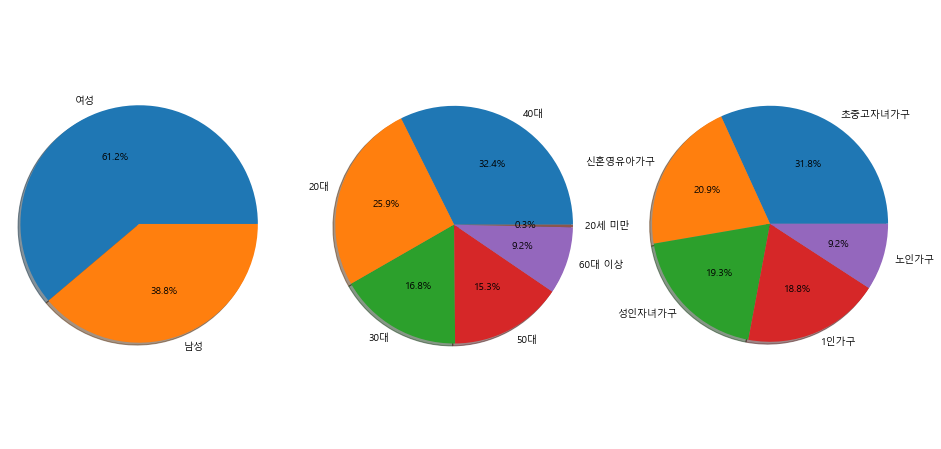

In [12]:
data_f = data[data['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령', '가구생애주기']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data[category].unique()
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

In [13]:
data_f_Seoul = data_f[data_f['고객소재지_광역시도'] == '서울특별시']
df = pd.DataFrame(data_f_Seoul['고객소재지_시군구'].value_counts())
df.sort_values(by = ['고객소재지_시군구'], axis=0, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index' : '고객소재지_시군구', '고객소재지_시군구' : '합계'}, inplace=True)
df

,고객소재지_시군구,합계
0,금천구,635
1,관악구,720
2,강북구,749
3,중구,754
4,양천구,759
5,도봉구,808
6,노원구,1132
7,중랑구,1184
8,광진구,1240
9,종로구,1249


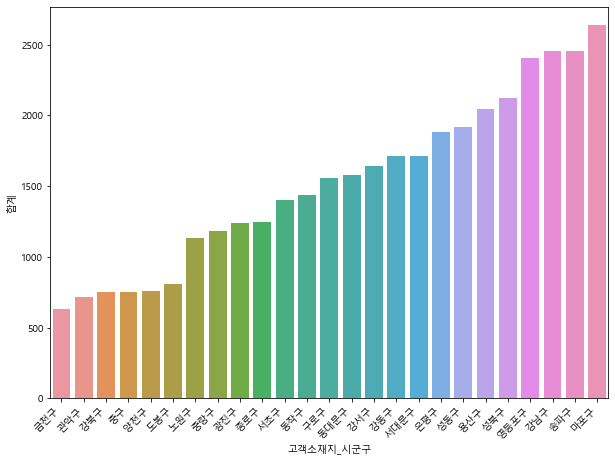

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.barplot(x = '고객소재지_시군구', y = '합계', data = df)
fig.autofmt_xdate(rotation = 45)

In [15]:
#인코딩 적용 함수 만들기
def get_dummies(column, df):
    dummies = pd.get_dummies(df[column])
    df.drop(column, axis = 1, inplace = True)
    df = df.join(dummies)
    return df

In [16]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

In [17]:
data_dummies.head()

,매출금액,매출건수,품목대분류코드,강남구,강동구,강북구,강서구,강화군,계양구,고양시,...,양천구,연수구,영등포구,옹진군,용산구,용인시,은평구,종로구,중구,중랑구
0,782521,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,963789,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,924309,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1089360,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1656740,58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0.87484
1    0.12516
Name: 품목대분류코드, dtype: float64


<AxesSubplot:xlabel='품목대분류코드', ylabel='count'>

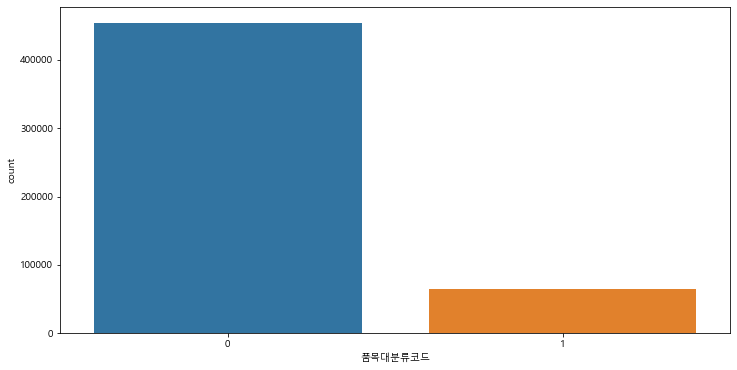

In [18]:
N = len(data_dummies)
print(data_dummies['품목대분류코드'].value_counts()/N)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.countplot(x = '품목대분류코드', data = data_dummies)

레이블 분포가 불규칙하므로 SMOTE기법 적용 필요

### 데이터 사전처리
#### 피처 데이터 가공


<AxesSubplot:xlabel='매출금액', ylabel='Density'>

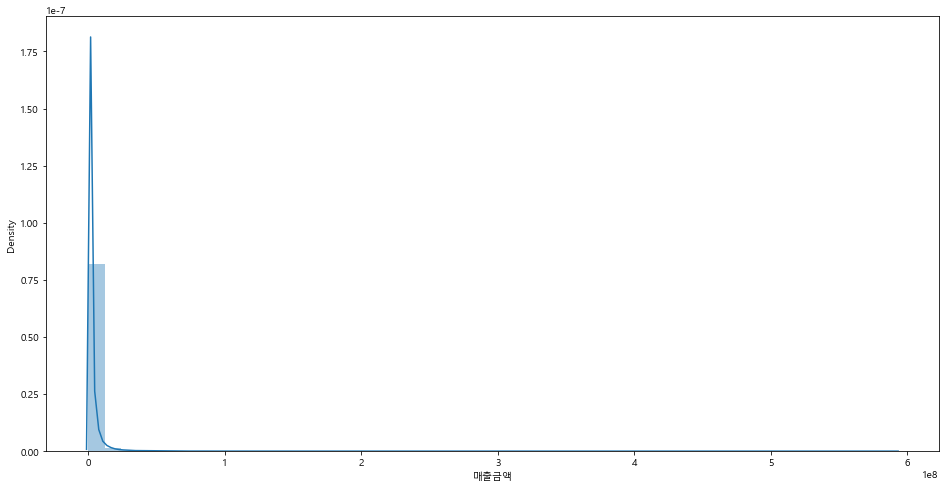

In [19]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출금액'])

<AxesSubplot:xlabel='매출건수', ylabel='Density'>

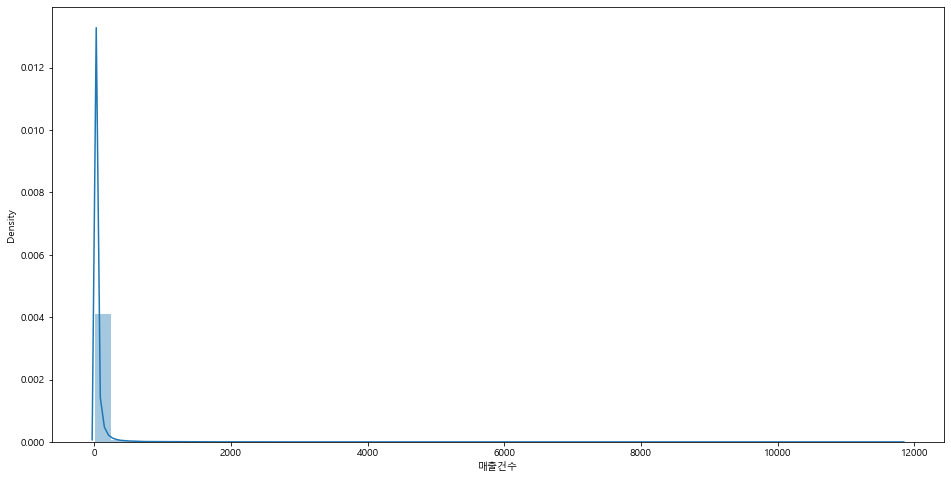

In [20]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출건수'])

피처들의 분포도가 불규칙 
* 로그 변환 적용
* 이상치 데이터 처리

In [21]:
def get_preprocessed_df(df, category):
    df_copy = df.copy()
    scaled = np.log1p(df_copy[category])
    df_copy.insert(0, category + '_Scaled', scaled)
    df_copy.drop(category, axis = 1, inplace = True)
    return df_copy

<AxesSubplot:xlabel='매출금액_Scaled', ylabel='Density'>

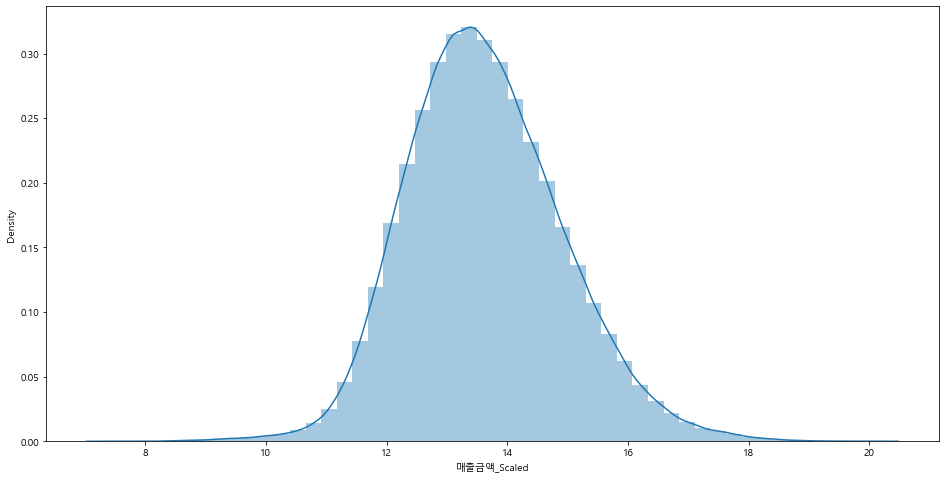

In [22]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출금액_Scaled'])

<AxesSubplot:xlabel='매출건수_Scaled', ylabel='Density'>

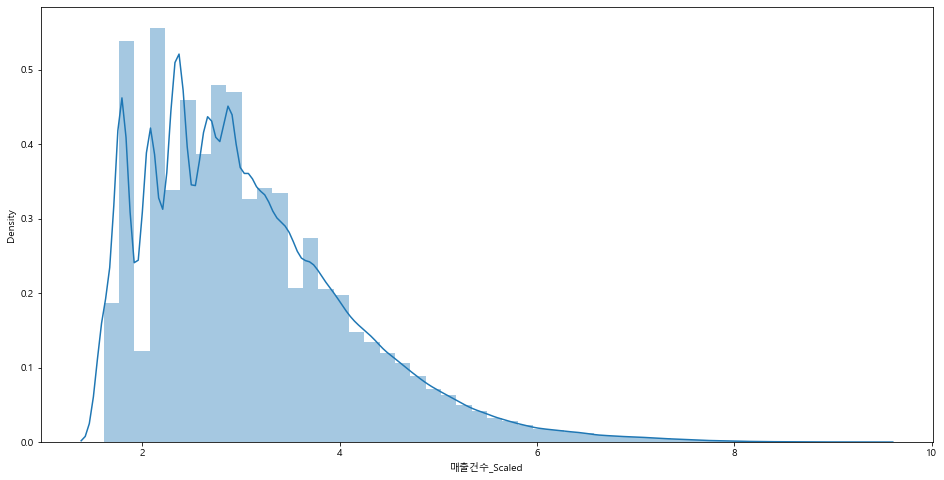

In [23]:
data_dummies = get_preprocessed_df(data_dummies, '매출건수')

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출건수_Scaled'])

매출건수가 로그변환 후에도 정규분포의 모양이 나오지 않음
* 매출금액과 매출건수는 비슷한 모양을 보일것임
* 매출금액과 매출건수의 상관계수 구해보기

In [24]:
df_M_and_C = data_dummies[['매출금액_Scaled','매출건수_Scaled']]
df_M_and_C.head()

,매출금액_Scaled,매출건수_Scaled
0,13.570277,2.639057
1,13.778629,3.401197
2,13.736803,3.850148
3,13.901102,4.007333
4,14.320363,4.077537


<AxesSubplot:>

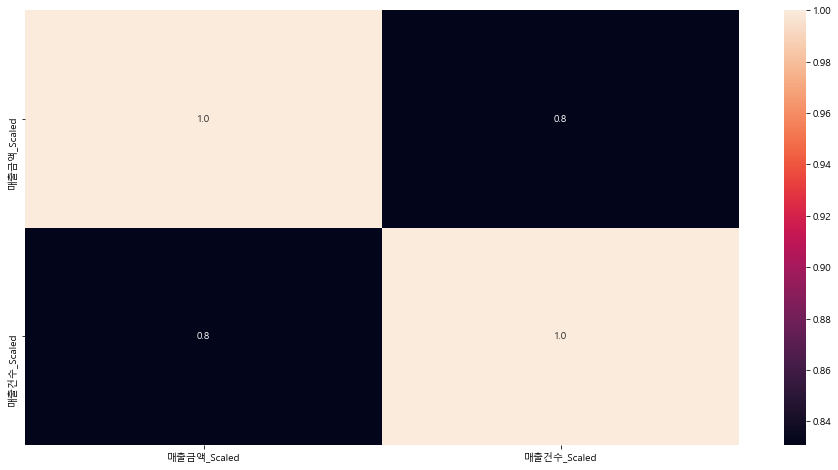

In [25]:
fig, ax = plt.subplots(1, 1, figsize= (16, 8))
sns.heatmap(df_M_and_C.corr(), annot=True, fmt = '.1f', ax = ax)

상관계수 0.8 -> 둘 중 하나 drop
* 무엇을 드랍하면 좋을지 확인해보기

In [26]:
target = data_dummies['품목대분류코드']
feature = df_M_and_C

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = pd.DataFrame(scaler.transform(feature), columns= feature.columns)

(array([0, 1]), [Text(0, 0, '매출금액_Scaled'), Text(1, 0, '매출건수_Scaled')])

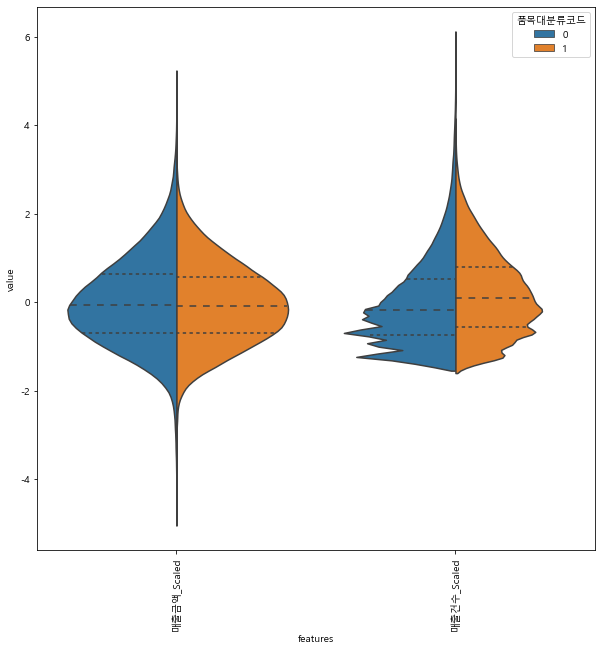

In [27]:
data = pd.concat([target, feature_scaled], axis = 1)
data = pd.melt(data, id_vars= '품목대분류코드', var_name= 'features', value_name= 'value')
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.violinplot(x = 'features', y = 'value', hue = '품목대분류코드', data = data, split = True, inner = 'quart')
plt.xticks(rotation= 90)

* 매출금액은 깔끔한 정규분포의 모양을 보이는데 반해, 타겟 변수 0, 1의 분포의 차이가 별로 없음 
* 매출건수는 깔끔한 정규분포의 모양을 보이지 않는데 반해, 타겟 변수 0, 1의 분포의 차이가 조금 있음
#### 모델링을 먼저 만들어 모델을 평가하면서 사후처리로 진행

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, dt_pred, dt_pred_proba)

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, rf_pred, rf_pred_proba)

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, lr_pred, lr_pred_proba)


오차 행렬
[[80198 10663]
 [10441  2558]]
정확도 : 0.7968, 정밀도 : 0.1935, 재현율 : 0.1968, F1 : 0.1951, AUC : 0.5397
오차 행렬
[[82460  8401]
 [10977  2022]]
정확도 : 0.8134, 정밀도 : 0.1940, 재현율 : 0.1556, F1 : 0.1727, AUC : 0.6365
오차 행렬
[[90782    79]
 [12999     0]]
정확도 : 0.8741, 정밀도 : 0.0000, 재현율 : 0.0000, F1 : 0.0000, AUC : 0.6681


In [30]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

get_model_train_eval(lr_clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

오차 행렬
[[55307 35554]
 [ 4278  8721]]
정확도 : 0.6165, 정밀도 : 0.1970, 재현율 : 0.6709, F1 : 0.3045, AUC : 0.6696


In [32]:
#DecisionTree 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_features, y_target, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores))) 

교차 검증 0 정확도: 0.7788
교차 검증 1 정확도: 0.7995
교차 검증 2 정확도: 0.7951
교차 검증 3 정확도: 0.7889
교차 검증 4 정확도: 0.8025
평균 정확도: 0.7930


In [33]:
# #RandomForest 교차검증
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(rf_clf, X_features, y_target, cv = 5)
# for iter_count, accuracy in enumerate(scores):
#     print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

# print('평균 정확도: {0:.4f}'.format(np.mean(scores))) 

In [34]:
#LogisiticRegression 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, X_features, y_target, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores))) 

교차 검증 0 정확도: 0.8741
교차 검증 1 정확도: 0.8743
교차 검증 2 정확도: 0.8745
교차 검증 3 정확도: 0.8729
교차 검증 4 정확도: 0.8742
평균 정확도: 0.8740


In [35]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.8748


In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [37]:
ftr_importances = pd.Series(dt_clf.feature_importances_, index = X_features.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

Feature importance:\매출금액_Scaled    0.687
매출건수_Scaled    0.125
고양시            0.009
용인시            0.009
수원시            0.009
성남시            0.009
송파구            0.007
은평구            0.007
강서구            0.006
강남구            0.006
강동구            0.006
서구             0.006
서대문구           0.006
동대문구           0.006
성북구            0.006
구로구            0.005
동작구            0.005
마포구            0.005
부평구            0.005
중랑구            0.005
dtype: float64


<AxesSubplot:>

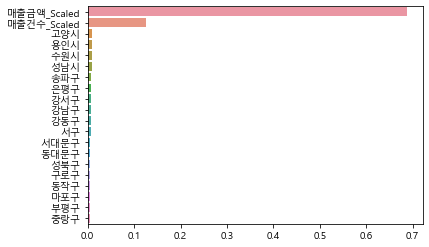

In [38]:
#feature importance 추출
print("Feature importance:\{0}".format(np.round(ftr_top20, 3)))

#feature importance를 column 별로 시각화하기
fig, ax = plt.subplots()
sns.barplot(x = ftr_top20, y = ftr_top20.index) 

## PCA로 차원을 축소 후 모델링 하기

In [39]:
from sklearn.decomposition import PCA


y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)
pca = PCA(n_components= 8)
pca.fit(X_features)
data_pca = pca.transform(X_features)
print(data_pca.shape)

(519297, 8)


In [40]:
pca_columns = []
for i in range(1, 9):
    component = 'pca_component_' + str(i)
    pca_columns.append(component)

df_pca = pd.DataFrame(data_pca, columns= pca_columns)
df_pca['target'] = y_target
df_pca.head()

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,pca_component_6,pca_component_7,pca_component_8,target
0,-0.319488,0.304959,-0.028970,-0.018604,0.009911,-0.130383,-0.004564,-0.057641,0
1,0.314641,-0.165983,-0.034393,-0.019050,0.011243,-0.125137,-0.007844,-0.052030,0
2,0.558695,-0.544877,-0.038849,-0.019770,0.012329,-0.122505,-0.010470,-0.046297,0
3,0.784951,-0.567185,-0.039037,-0.019525,0.012381,-0.121085,-0.010635,-0.046929,0
4,1.158174,-0.363854,-0.036469,-0.018457,0.011771,-0.119487,-0.009250,-0.052315,0


In [41]:
from imblearn.over_sampling import SMOTE

X_features = df_pca.drop('target', axis = 1)
y_target = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()

clf_list = [dt_clf, lr_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

오차 행렬
[[71233 19628]
 [ 8590  4409]]
정확도 : 0.7283, 정밀도 : 0.1834, 재현율 : 0.3392, F1 : 0.2381, AUC : 0.5617
오차 행렬
[[54157 36704]
 [ 4385  8614]]
정확도 : 0.6044, 정밀도 : 0.1901, 재현율 : 0.6627, F1 : 0.2954, AUC : 0.6587


## 이상치 데이터 처리 후 모델링 평가

In [42]:
def get_outlier_0(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index


def get_outlier_1(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index    

In [55]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data = get_encoding(data, '품목대분류코드', 16)

outlier_index = get_outlier_1(df = data, column='매출금액', weight= 1.5, target = '품목대분류코드')
data.drop(outlier_index, axis = 0, inplace=True)

outlier_index = get_outlier_1(df = data, column='매출건수', weight= 1.5, target = '품목대분류코드')
data.drop(outlier_index, axis = 0, inplace=True)

columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
print(data_dummies.shape)

(509785, 41)


In [58]:
def get_outlier(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [59]:
outlier_index = get_outlier(df = data_dummies, column='매출금액_Scaled', weight= 1.5, target = '품목대분류코드')
data_dummies.drop(outlier_index, axis = 0, inplace=True)

outlier_index = get_outlier(df = data_dummies, column='매출건수_Scaled', weight= 1.5, target = '품목대분류코드')
data_dummies.drop(outlier_index, axis = 0, inplace=True)
print(data_dummies.shape)

(493717, 41)


In [60]:
from sklearn.decomposition import PCA


y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

print(y_target.shape)
print(X_features.shape)

n = 8
pca = PCA(n_components= n)
data_pca = pca.fit_transform(X_features)
print(data_pca.shape)

pca_columns = []
for i in range(1, n + 1):
    component = 'pca_component_' + str(i)
    pca_columns.append(component)

df_pca = pd.DataFrame(data_pca, columns= pca_columns)
df_pca['target'] = np.array(y_target)
#df_pca.fillna(0, inplace=True)

#df_pca['매출금액_Scaled'] = np.array(data_dummies['매출금액_Scaled'])
#df_pca['매출건수_Scaled'] = np.array(data_dummies['매출건수_Scaled'])

# # df_pca.dropna(inplace = True)
# df_pca['매출금액_Scaled'].fillna(df_pca['매출금액_Scaled'].mean(), inplace =True)
# df_pca['매출건수_Scaled'].fillna(df_pca['매출건수_Scaled'].mean(), inplace =True)

(493717,)
(493717, 40)
(493717, 8)


In [61]:
from imblearn.over_sampling import SMOTE

X_features = df_pca.drop('target', axis = 1)
y_target = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()

clf_list = [dt_clf, lr_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

오차 행렬
[[69137 18510]
 [ 7122  3975]]
정확도 : 0.7404, 정밀도 : 0.1768, 재현율 : 0.3582, F1 : 0.2367, AUC : 0.5735
오차 행렬
[[52362 35285]
 [ 3757  7340]]
정확도 : 0.6046, 정밀도 : 0.1722, 재현율 : 0.6614, F1 : 0.2733, AUC : 0.6637


In [48]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data = get_encoding(data, '품목대분류코드', 16)

columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
print(data_dummies.shape)


(519297, 41)


In [62]:
from lightgbm import LGBMClassifier

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

lr_clf = LogisticRegression()
lgbm_clf = LGBMClassifier(n_estimators= 1000, num_leaves= 64, n_jobs= -1, boost_from_average = False)

clf_list = [lr_clf, lgbm_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

오차 행렬
[[52929 34718]
 [ 3694  7403]]
정확도 : 0.6110, 정밀도 : 0.1758, 재현율 : 0.6671, F1 : 0.2782, AUC : 0.6715
오차 행렬
[[62856 24791]
 [ 4814  6283]]
정확도 : 0.7002, 정밀도 : 0.2022, 재현율 : 0.5662, F1 : 0.2980, AUC : 0.7246


In [65]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators = 1000)
xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds= 200, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-auc:0.71959	validation_1-auc:0.70783
[1]	validation_0-auc:0.74445	validation_1-auc:0.72628
[2]	validation_0-auc:0.75212	validation_1-auc:0.73113
[3]	validation_0-auc:0.75682	validation_1-auc:0.73416
[4]	validation_0-auc:0.76212	validation_1-auc:0.73750
[5]	validation_0-auc:0.76478	validation_1-auc:0.73874
[6]	validation_0-auc:0.76688	validation_1-auc:0.73994
[7]	validation_0-auc:0.77028	validation_1-auc:0.74074
[8]	validation_0-auc:0.77306	validation_1-auc:0.74152
[9]	validation_0-auc:0.77461	validation_1-auc:0.74323
[10]	validation_0-auc:0.77767	validation_1-auc:0.74453
[11]	validation_0-auc:0.78052	validation_1-auc:0.74580
[12]	validation_0-auc:0.78223	validation_1-auc:0.74603
[13]	validation_0-auc:0.78439	validation_1-auc:0.74653
[14]	validation_0-auc:0.78482	validation_1-auc:0.74690
[15]	validation_0-auc:0.78583	validation_1-auc:0.74739
[16]	validation_0-auc:0.78728	validation_1-auc:0.74798
[17]	validation_0-auc:0.78792	validation_1-auc:0.74849
[18]	validation_0-au

In [66]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_over, y_train_over)
gb_pred = gb_clf.predict(X_test)
gb_pred_proba = gb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, gb_pred, gb_pred_proba)

오차 행렬
[[48702 38945]
 [ 2056  9041]]
정확도 : 0.5848, 정밀도 : 0.1884, 재현율 : 0.8147, F1 : 0.3060, AUC : 0.7477


In [70]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators = 100)

params = {
    'max_depth' : [5, 7],
    'min_child_weight' : [1, 3],
    'colsample_bytree' : [0.5, 0.75]
}

grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv = 3, verbose= 1)
grid_cv.fit(X_train_over, y_train_over, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[0]	validation_0-auc:0.62356	validation_1-auc:0.60977
[1]	validation_0-auc:0.72255	validation_1-auc:0.70638
[2]	validation_0-auc:0.72575	validation_1-auc:0.70856
[3]	validation_0-auc:0.72808	validation_1-auc:0.71086
[4]	validation_0-auc:0.73346	validation_1-auc:0.71637
[5]	validation_0-auc:0.74459	validation_1-auc:0.71401
[6]	validation_0-auc:0.74516	validation_1-auc:0.71454
[7]	validation_0-auc:0.74719	validation_1-auc:0.71712
[8]	validation_0-auc:0.74814	validation_1-auc:0.71804
[9]	validation_0-auc:0.75357	validation_1-auc:0.72723
[10]	validation_0-auc:0.75416	validation_1-auc:0.72790
[11]	validation_0-auc:0.76260	validation_1-auc:0.72972
[12]	validation_0-auc:0.76340	validation_1-auc:0.73045
[13]	validation_0-auc:0.76761	validation_1-auc:0.72999
[14]	validation_0-auc:0.77138	validation_1-auc:0.72935
[15]	validation_0-auc:0.77194	validation_1-auc:0.72998
[16]	validation_0-auc:0.77712	validation_1-auc:0.72918
[17]	validation

In [72]:
xgb_clf = XGBClassifier(n_estimators = 1000, learning_rate = 0.02, max_depth = 7, min_child_weight = 1, colsample_bytree = 0.5)
xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-auc:0.64435	validation_1-auc:0.60406
[1]	validation_0-auc:0.75155	validation_1-auc:0.71819
[2]	validation_0-auc:0.75467	validation_1-auc:0.72070
[3]	validation_0-auc:0.75653	validation_1-auc:0.72229
[4]	validation_0-auc:0.75772	validation_1-auc:0.72395
[5]	validation_0-auc:0.75694	validation_1-auc:0.71933
[6]	validation_0-auc:0.75781	validation_1-auc:0.71958
[7]	validation_0-auc:0.75743	validation_1-auc:0.71905
[8]	validation_0-auc:0.75801	validation_1-auc:0.71953
[9]	validation_0-auc:0.76258	validation_1-auc:0.72723
[10]	validation_0-auc:0.76190	validation_1-auc:0.72655
[11]	validation_0-auc:0.76067	validation_1-auc:0.72361
[12]	validation_0-auc:0.75999	validation_1-auc:0.72281
[13]	validation_0-auc:0.75780	validation_1-auc:0.71977
[14]	validation_0-auc:0.75667	validation_1-auc:0.71759
[15]	validation_0-auc:0.75724	validation_1-auc:0.71825
[16]	validation_0-auc:0.75599	validation_1-auc:0.71601
[17]	validation_0-auc:0.75576	validation_1-auc:0.71579
[18]	validation_0-au

In [74]:
lgbm_clf = LGBMClassifier(n_estimators= 200)

params = {
    'num_leaves' : [32, 64],
    'max_depth' : [128, 160],
    'min_child_samples' : [60, 100],
    'subsample' : [0.8, 1]
}

gridcv = GridSearchCV(lgbm_clf, param_grid= params, cv = 3)
gridcv.fit(X_train_over, y_train_over, early_stopping_rounds =  30, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
print('최고 auc: {0:.4f}'.format(roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')))
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

[1]	valid_0's auc: 0.737954	valid_0's binary_logloss: 0.674474	valid_1's auc: 0.71746	valid_1's binary_logloss: 0.675157
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.750003	valid_0's binary_logloss: 0.658663	valid_1's auc: 0.725518	valid_1's binary_logloss: 0.660245
[3]	valid_0's auc: 0.753871	valid_0's binary_logloss: 0.645398	valid_1's auc: 0.727878	valid_1's binary_logloss: 0.647984
[4]	valid_0's auc: 0.763063	valid_0's binary_logloss: 0.633571	valid_1's auc: 0.735453	valid_1's binary_logloss: 0.637375
[5]	valid_0's auc: 0.765784	valid_0's binary_logloss: 0.62354	valid_1's auc: 0.735605	valid_1's binary_logloss: 0.628572
[6]	valid_0's auc: 0.766823	valid_0's binary_logloss: 0.614935	valid_1's auc: 0.736275	valid_1's binary_logloss: 0.621231
[7]	valid_0's auc: 0.77159	valid_0's binary_logloss: 0.606573	valid_1's auc: 0.737326	valid_1's binary_logloss: 0.614128
[8]	valid_0's auc: 0.775227	valid_0's binary_logloss: 0.599299	valid_1's auc: 0.738084	v

In [75]:
lgbm_clf = LGBMClassifier(n_estimators= 1000, num_leaves= 64, max_depth= 128, min_child_samples= 60, subsample= 0.8, n_jobs= -1, boost_from_average = False)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train_over, y_train_over, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = evals, verbose= True)

get_model_train_eval(lgbm_clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

[1]	valid_0's auc: 0.729233	valid_0's binary_logloss: 0.673234
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.735254	valid_0's binary_logloss: 0.656767
[3]	valid_0's auc: 0.734699	valid_0's binary_logloss: 0.642955
[4]	valid_0's auc: 0.737124	valid_0's binary_logloss: 0.631552
[5]	valid_0's auc: 0.738496	valid_0's binary_logloss: 0.621741
[6]	valid_0's auc: 0.739536	valid_0's binary_logloss: 0.613727
[7]	valid_0's auc: 0.739784	valid_0's binary_logloss: 0.606618
[8]	valid_0's auc: 0.741357	valid_0's binary_logloss: 0.600484
[9]	valid_0's auc: 0.74089	valid_0's binary_logloss: 0.594292
[10]	valid_0's auc: 0.741189	valid_0's binary_logloss: 0.589255
[11]	valid_0's auc: 0.741753	valid_0's binary_logloss: 0.58459
[12]	valid_0's auc: 0.742033	valid_0's binary_logloss: 0.580375
[13]	valid_0's auc: 0.742462	valid_0's binary_logloss: 0.576666
[14]	valid_0's auc: 0.742679	valid_0's binary_logloss: 0.573387
[15]	valid_0's auc: 0.744051	valid_0's binary_logloss